## Regression with an Abalone Dataset

The aim of this competition is to estimate the age of abalone from various physical measurements. Abalones are an important part of the seafood industry and age estimation plays a critical role in the conservation and management of this species. In this project, regression techniques will be applied to make accurate estimates of abalone age using physical characteristics.

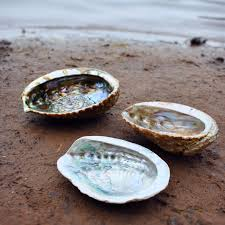



<a href='https://www.kaggle.com/competitions/playground-series-s4e4/' target=_blank>You can find the competition here</a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
#Reading the file.

## EDA - Exploratory Data Analysis

In [4]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [6]:
train.shape, test.shape

((90615, 10), (60411, 9))

In [7]:
train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

In [3]:
df=pd.concat([train,test])
#Merging the file.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151026 entries, 0 to 60410
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              151026 non-null  int64  
 1   Sex             151026 non-null  object 
 2   Length          151026 non-null  float64
 3   Diameter        151026 non-null  float64
 4   Height          151026 non-null  float64
 5   Whole weight    151026 non-null  float64
 6   Whole weight.1  151026 non-null  float64
 7   Whole weight.2  151026 non-null  float64
 8   Shell weight    151026 non-null  float64
 9   Rings           90615 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.7+ MB


In [11]:
# d={'F':0, 'I':1, 'M':2}

In [12]:
# df['Sex']=df['Sex'].map(d)

## Data Visualization

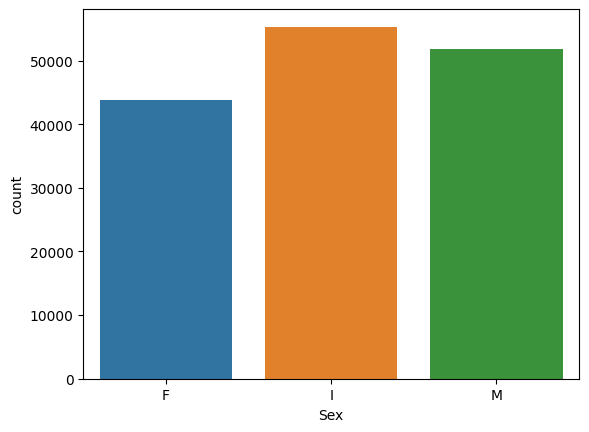

In [13]:
sns.countplot(x=df['Sex']);

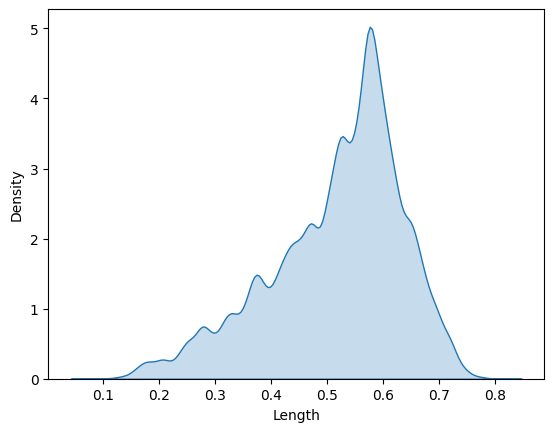

In [14]:
sns.kdeplot(x=df['Length'], fill=True);

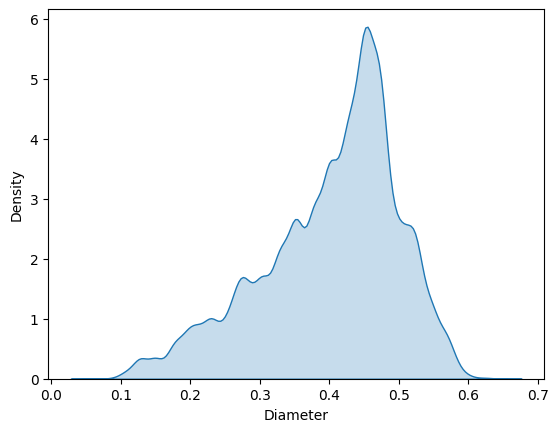

In [15]:
sns.kdeplot(x=df['Diameter'], fill=True);

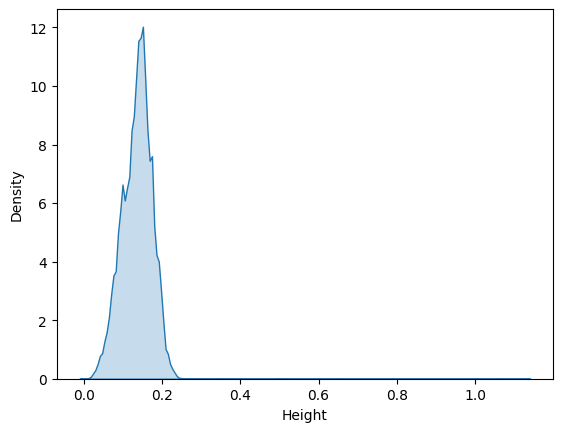

In [16]:
sns.kdeplot(x=df['Height'], fill=True);

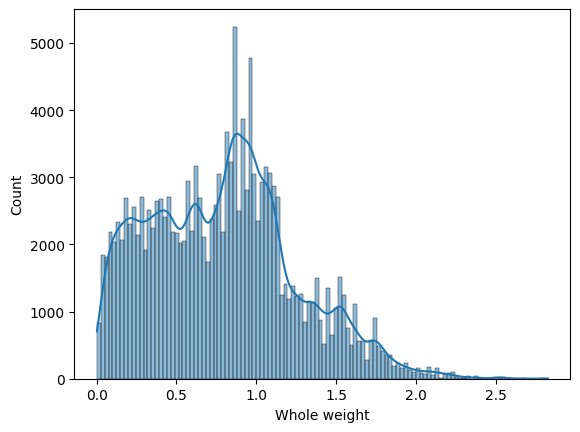

In [17]:
sns.histplot(x=df['Whole weight'], kde=True);

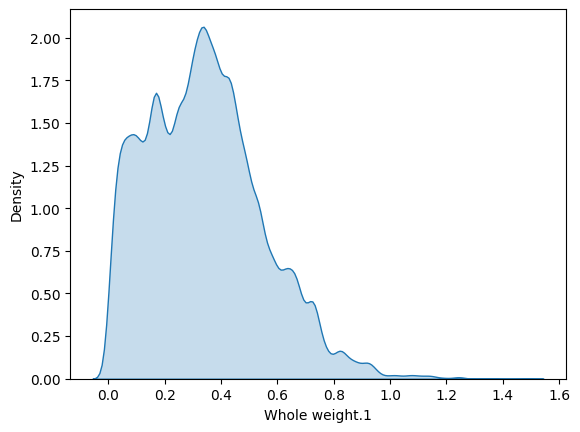

In [18]:
sns.kdeplot(x=df['Whole weight.1'], fill=True);

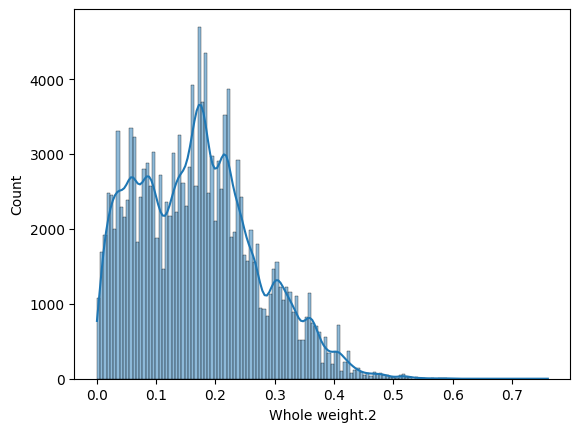

In [19]:
sns.histplot(x=df['Whole weight.2'], kde=True);

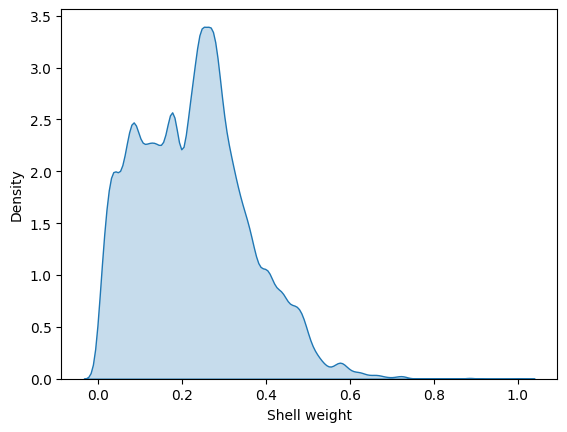

In [20]:
sns.kdeplot(x=df['Shell weight'], fill=True);

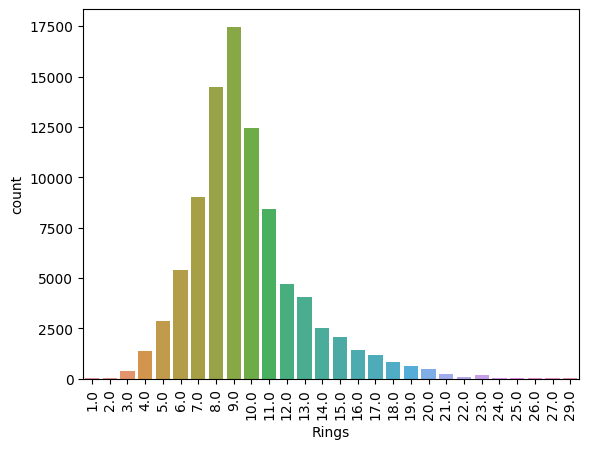

In [21]:
sns.countplot(x=df['Rings'])
plt.xticks(rotation=90);

## Modelling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
train.shape

(90615, 10)

In [6]:
df=pd.get_dummies(df)

In [7]:
train=df[:90615]
test=df[90615:]

In [8]:
train.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0,True,False,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0,True,False,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0,False,True,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0,False,False,True
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0,False,True,False


In [9]:
x=train.drop('Rings', axis=1)
y=train[['Rings']]

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
pred=lr.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 2.0237293747135707
R2 Score: 0.6013104882981961


In [46]:
def rmsle(y_test, pred):
    # Logaritma hesaplama
    log_true = np.log1p(y_test)  # log(yi + 1)
    log_pred = np.log1p(pred)  # log(ŷi + 1)

    # RMSLE hesaplama
    return np.sqrt(np.mean((log_true - log_pred) ** 2))

# RMSLE hesaplama
error = rmsle(y_test, pred)
print("RMSLE:", error)

RMSLE: 0.16568521715213982


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
   
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [31]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,6.551767e-01,1.882059e+00,1.264173e+00
Gradient Boosting,6.416005e-01,1.918752e+00,1.299121e+00
Linear,6.013105e-01,2.023729e+00,1.393111e+00
Ridge,6.010060e-01,2.024502e+00,1.393154e+00
KNeighborsRegressor,4.007165e-01,2.481140e+00,1.984011e+00
Decision Tree,3.118289e-01,2.658785e+00,1.746400e+00
Extra Tree,2.605144e-01,2.756131e+00,1.803399e+00
ElasticNet,1.225776e-01,3.002198e+00,2.152684e+00
Lasso,-2.466840e-05,3.205091e+00,2.349228e+00
SVR,-3.451663e-02,3.259896e+00,2.269623e+00


## Test Data Prediction

In [11]:
df=pd.get_dummies(df)

In [12]:
train=df[:90615]
test=df[90615:]

In [13]:
train.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0,True,False,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0,True,False,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0,False,True,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0,False,False,True
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0,False,True,False


In [14]:
test.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,NaN,False,False,True
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,NaN,False,False,True
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,NaN,False,False,True
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,NaN,False,False,True
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,NaN,False,True,False


In [15]:
x=train.drop('Rings', axis=1)
y=train[['Rings']]

In [18]:
xgb=XGBRegressor()
xgb.fit(x_train, y_train)
x_test=test.drop('Rings', axis=1)

In [19]:
predictions=xgb.predict(x_test)

In [20]:
predictions

array([10.065846,  9.369676, 10.068683, ..., 12.963203, 13.488554,
        8.543277], dtype=float32)

In [21]:
predictions1=pd.DataFrame()

In [22]:
predictions1['id']=test['id']

In [23]:
predictions1['Rings']=predictions

In [24]:
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 0 to 60410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      60411 non-null  int64  
 1   Rings   60411 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 1.2 MB


In [25]:
predictions1.to_csv('abalone_submission.csv', index=False)

## Summary

The abalone dataset contains physical measurements and their corresponding age information. The training and test datasets were combined to create a single dataset for analysis. The relationships between variables were examined by drawing graphs on the combined dataset. In particular, the effects of physical measurements on the age of the abalone were visualized.
The dataset was divided into training and test sets for model training. This step is a critical step to evaluate the overall performance of the model.
The age of the abalone was estimated using different regression models (e.g., Linear Regression, Decision Trees, Gradient Boosting). The selected model was trained on the training dataset. Predictions were made on the test dataset and the accuracy of the model was evaluated. Performance metrics were used to measure the accuracy of the predictions. The obtained predictions were recorded in a submission file and presented in accordance with the competition rules.
This project includes important steps such as regression analysis, data visualization, and machine learning modeling while performing the task of estimating the age of the abalone. In this way, valuable information is provided for seafood management and conservation.